#                                 Insurance Claim Prediction

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
#Train Dataset
df = pd.read_csv('E:\\5_New_Job\\Insurance_Claim_prediction\\train_data.csv') # After read data from git hub, To save the data frame in PC
df.drop(df.columns[0], axis=1, inplace=True)
df_train = df
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
#Test Dataset
df1 = pd.read_csv("E:\\5_New_Job\\Insurance_Claim_prediction\\test_data.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)
df_test = df1
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


###  Data Analysis

In [4]:
#Dataset Dimension
df_train.shape

(7160, 14)

In [5]:
df_test.shape

(3069, 13)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


#### Missing values

In [7]:
Total = df_train.isnull().sum().sort_values(ascending=False) 
Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   
missing_values = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_values

,Total,Percentage of Missing Values
Date_of_Occupancy,508,7.094972
Building Dimension,106,1.480447
Geo_Code,102,1.424581
Garden,7,0.097765
Customer Id,0,0.000000
YearOfObservation,0,0.000000
Insured_Period,0,0.000000
Residential,0,0.000000
Building_Painted,0,0.000000
Building_Fenced,0,0.000000


The missing values are present in the data for the Date_of_Occupancy, Building Dimension, Geo_Code, and Garden variables

Visualize Missing Values using Heatmap

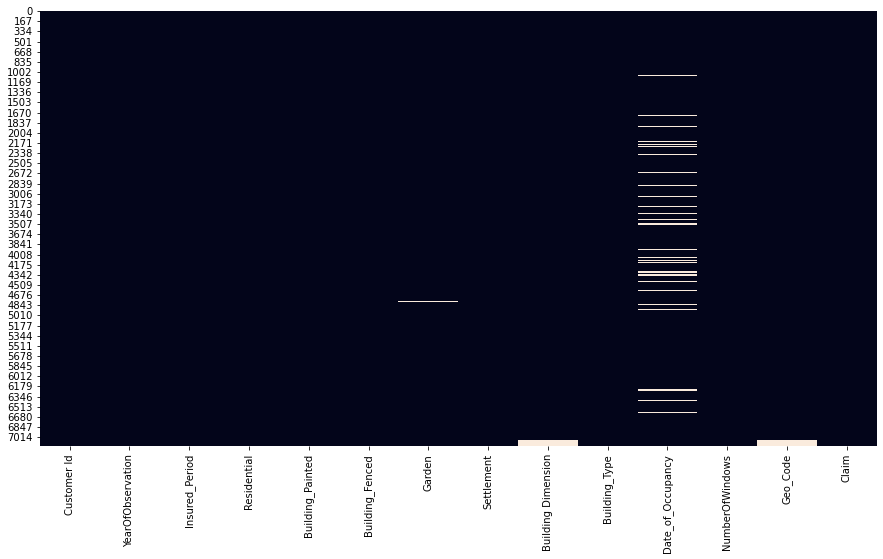

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

Deal with Missing Values

In [9]:
#We replace missing values for the building dimension and date of occupancy with Median since
#Both are highly skewed
df_train['Date_of_Occupancy'] = df_train['Date_of_Occupancy'].fillna(df_train['Date_of_Occupancy'].median())
df_train['Building Dimension'] = df_train['Building Dimension'].fillna(df_train['Building Dimension'].median())

In [11]:
#We replace the categorical variables with the mode
df_train['Garden'] = df_train['Garden'].fillna(df_train['Garden'].mode()[0])
df_train['Geo_Code'] = df_train['Geo_Code'].fillna(df_train['Geo_Code'].mode()[0])

In [12]:
df_train.isnull().sum()
#Now, we obtain the dataset with no missing values

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

# Exploratory Data Analysis

In [13]:
#For categorical feature
df_train.describe(include = object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7160,7160,7160,7160
unique,7160,2,2,2,2,11,1307
top,H14663,V,N,O,R,.,6088
freq,1,5382,3608,3609,3610,3551,245


In [14]:
#In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables
df_train.describe().round(2)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.00,7160.00,7160.00,7160.00,7160.00,7160.00,7160.00
mean,2013.67,0.91,0.31,1871.87,2.19,1964.85,0.23
std,1.38,0.24,0.46,2263.30,0.94,34.73,0.42
min,2012.00,0.00,0.00,1.00,1.00,1545.00,0.00
25%,2012.00,1.00,0.00,531.50,2.00,1960.00,0.00
50%,2013.00,1.00,0.00,1083.00,2.00,1970.00,0.00
75%,2015.00,1.00,1.00,2250.00,3.00,1980.00,0.00
max,2016.00,1.00,1.00,20940.00,4.00,2016.00,1.00


#### Correlation

In order to compute the correlation matrix, we perform the following:

        1. Filter out only the numeric variables from the dataframe using select_dtypes() function<br>
        2. Call the corr() function which will return the correlation matrix of numeric variables <br>
        3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

In [15]:
df_num_features = df_train.select_dtypes(include=np.number)
df_num_features.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [16]:
corr =  df_num_features.corr()
corr

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.010959,0.005490,-0.030230,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.008822,-0.017811,-0.010523,0.088715
Residential,-0.040391,-0.037620,1.000000,0.056357,0.334039,-0.036885,0.063509
Building Dimension,0.010959,0.008822,0.056357,1.000000,0.009184,0.196190,0.295558
Building_Type,0.005490,-0.017811,0.334039,0.009184,1.000000,-0.137001,0.112168
Date_of_Occupancy,-0.030230,-0.010523,-0.036885,0.196190,-0.137001,1.000000,0.017781
Claim,-0.016367,0.088715,0.063509,0.295558,0.112168,0.017781,1.000000


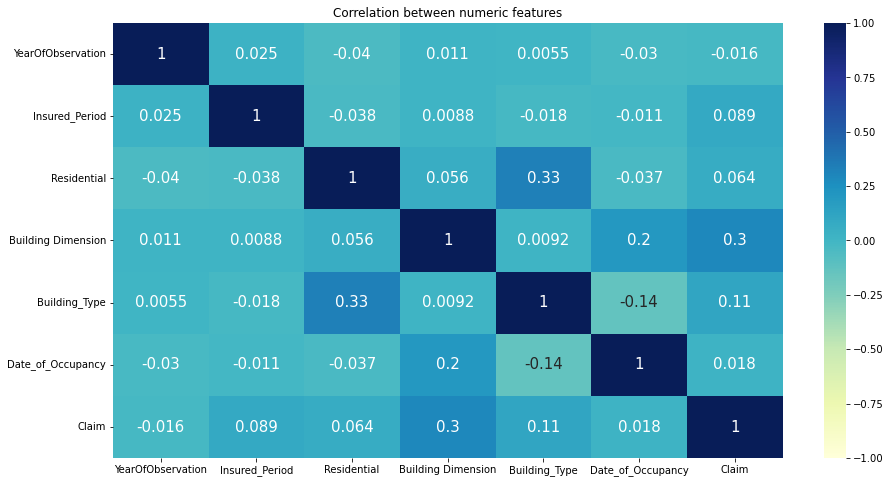

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other

#### Analyze Numerical Variables

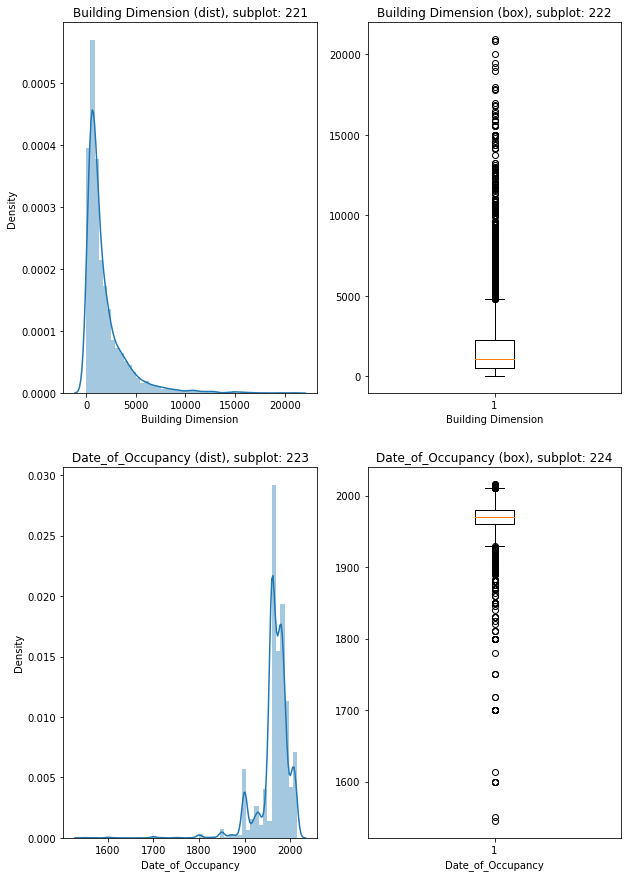

In [18]:
#Numerical Data
train_num = ['Building Dimension', 'Date_of_Occupancy']

#  plot Numerical Data
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,15))

for i in train_num:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df_train[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df_train[i])
    c = c + 1

    #plt.subplot(a, b, c)
    #plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    #plt.xlabel(i)
    #sns.scatterplot(data = train_df, x = i, y = 'chol', hue = 'claim')
    #c = c + 1

plt.show()

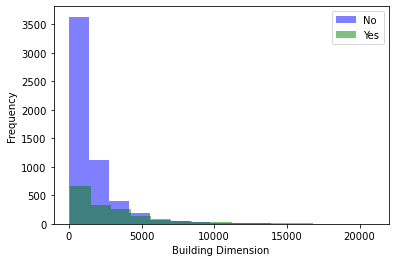

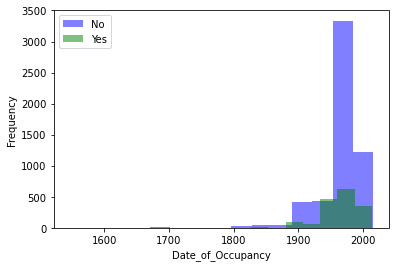

In [19]:
for i in train_num:
    
    fig, ax = plt.subplots()

    ax.hist(df_train[df_train['Claim']==0][i], bins=15, alpha=0.5, color="blue", label="No")
    ax.hist(df_train[df_train['Claim']==1][i], bins=15, alpha=0.5, color="green", label="Yes")

    ax.set_xlabel(i)
    ax.set_ylabel("Frequency")

    ax.legend()

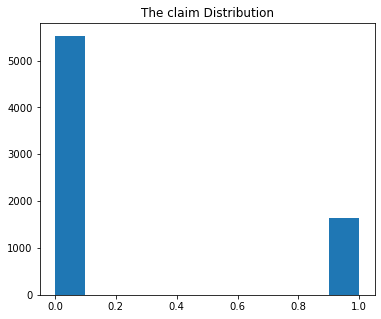

In [20]:
#The target variable distribution
fig = plt.figure(figsize=(6,5))
plt.title('The claim Distribution')
plt.hist(df_train['Claim'])
plt.show()

#### Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [21]:
df_train.describe(include = object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7160,7160,7160,7160
unique,7160,2,2,2,2,11,1307
top,H14663,V,N,O,R,.,6088
freq,1,5382,3608,3609,3610,3551,245


There are 7 categorical variables. From the output we see that the Customer Id and Geo Code has most number of categories.

Let us visualize the variables. However, we shall exculde the variable city from it.

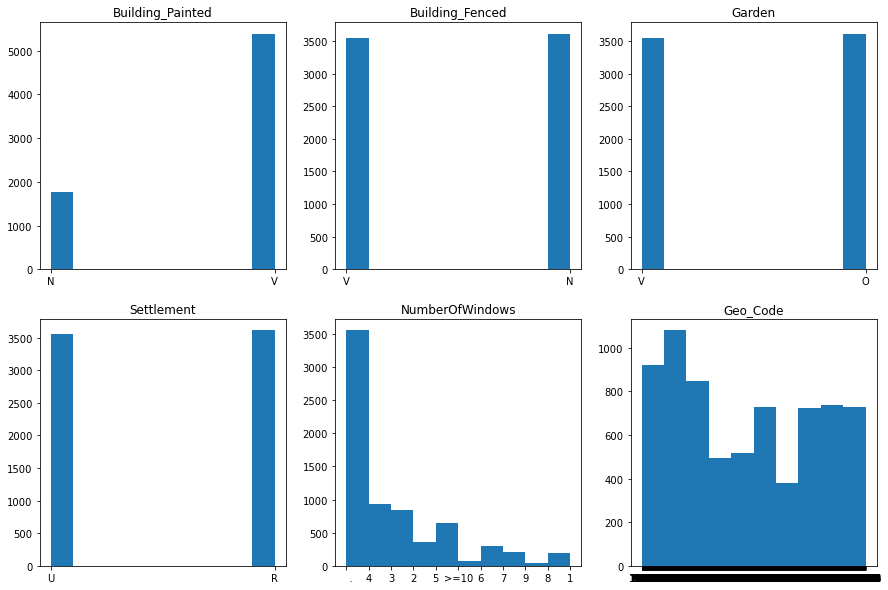

In [22]:
#Categorical Variables
train_cat = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows','Geo_Code']

#  plot Numerical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in train_cat:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    #plt.xlabel(i)
    plt.hist(df_train[i])
    c = c + 1

plt.show()

#### Analyze Relationship Between Target and Categorical Variables

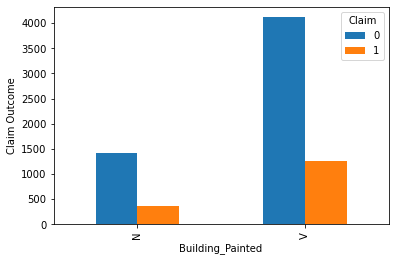

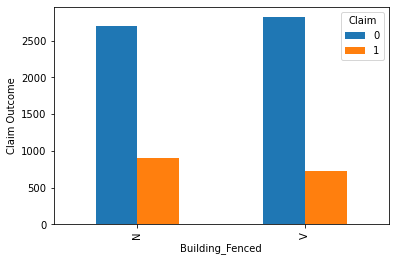

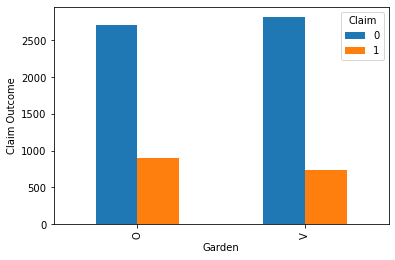

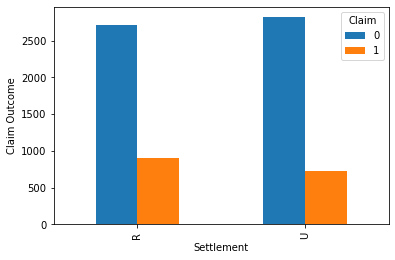

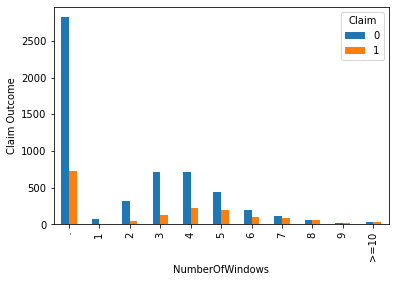

In [23]:
#Categorical Variables
train_cat = ['Building_Painted','Building_Fenced','Garden','Settlement','NumberOfWindows']

for i in train_cat:

    pd.crosstab(df_train[i], df_train.Claim).plot(kind = 'bar')
    plt.xlabel('{}'.format(i))
    plt.ylabel('Claim Outcome')
    
plt.show()

# Feature Engineering

#### Remove outliers

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data

In order to detect outliers in numerical data, we perform the following:

       1. Plot boxplot for numerical data.
       2. Note the variables for which outliers are present.
       3. Remove outliers by IQR method.
       4. Plot boxplot to recheck for outliers.

In [24]:
train_df_copy = df_train.copy()

In [25]:
train_df_copy.shape

(7160, 14)

In [26]:
df_train.describe().round(2)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.00,7160.00,7160.00,7160.00,7160.00,7160.00,7160.00
mean,2013.67,0.91,0.31,1871.87,2.19,1964.85,0.23
std,1.38,0.24,0.46,2263.30,0.94,34.73,0.42
min,2012.00,0.00,0.00,1.00,1.00,1545.00,0.00
25%,2012.00,1.00,0.00,531.50,2.00,1960.00,0.00
50%,2013.00,1.00,0.00,1083.00,2.00,1970.00,0.00
75%,2015.00,1.00,1.00,2250.00,3.00,1980.00,0.00
max,2016.00,1.00,1.00,20940.00,4.00,2016.00,1.00


Plot boxplot for numerical data

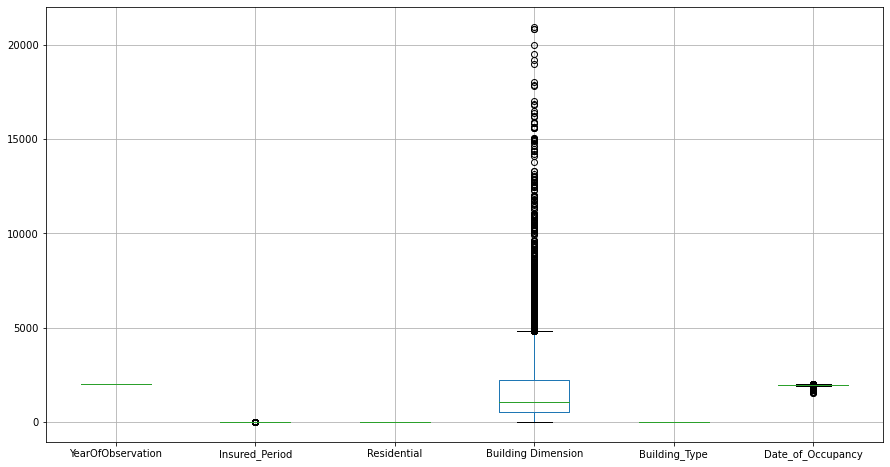

In [27]:
plt.rcParams['figure.figsize']=(15,8)
df_num_features.boxplot(column=['YearOfObservation', 'Insured_Period', 'Residential','Building Dimension', 'Building_Type', 'Date_of_Occupancy'])
plt.show()

The variables for which outliers are present

From the above plot, we notice that for the variable 'Building Dimension' there are points above the upper extreme - these points are outliers

Let us use the IQR method to remove the outliers

In [28]:
Q1 = df_num_features.drop(['Claim'], axis=1).quantile(0.25)
Q3 = df_num_features.drop(['Claim'], axis=1).quantile(0.75)

IQR = Q3 - Q1


print(IQR)

YearOfObservation        3.000000
Insured_Period           0.002732
Residential              1.000000
Building Dimension    1718.500000
Building_Type            1.000000
Date_of_Occupancy       20.000000
dtype: float64


In [29]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
#A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed
# check the shape of data using shape
df_train.shape

(4753, 14)

So that the above output shows there is a reduction in the number of rows(from 7160 to 4753). Now, to confirm that the outliers have been removed let us visualize using a boxplot.

Plot boxplot to recheck for outliers

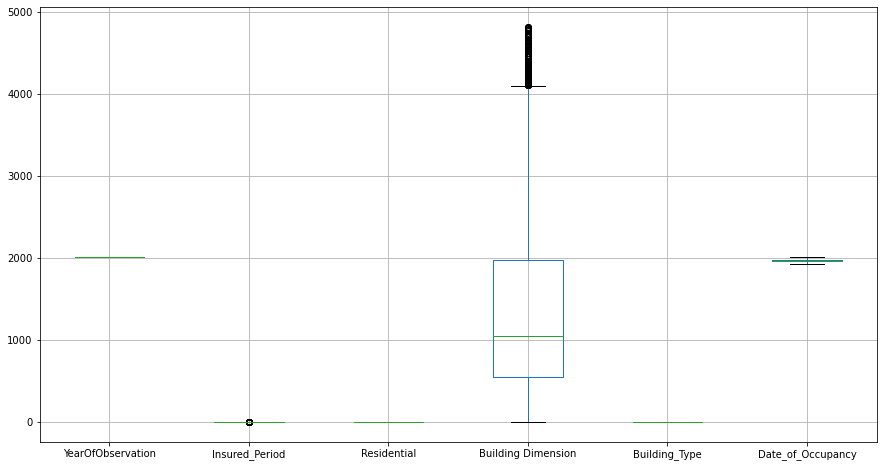

In [31]:
plt.rcParams['figure.figsize']=(15,8)
df_train.boxplot(column=['YearOfObservation', 'Insured_Period', 'Residential','Building Dimension', 'Building_Type', 'Date_of_Occupancy'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

#### Recheck the Correlation

In [32]:
df_num_features = df_train.select_dtypes(include=np.number)
df_num_features.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [33]:
corr =  df_num_features.corr()
corr

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,-0.512909,-0.044705,0.029800,0.008481,-0.002968,-0.007811
Insured_Period,-0.512909,1.000000,0.027067,-0.029293,0.008863,0.014327,0.011883
Residential,-0.044705,0.027067,1.000000,0.003825,0.338767,-0.075446,0.062622
Building Dimension,0.029800,-0.029293,0.003825,1.000000,-0.038827,0.274446,0.247854
Building_Type,0.008481,0.008863,0.338767,-0.038827,1.000000,-0.199139,0.109936
Date_of_Occupancy,-0.002968,0.014327,-0.075446,0.274446,-0.199139,1.000000,0.009088
Claim,-0.007811,0.011883,0.062622,0.247854,0.109936,0.009088,1.000000


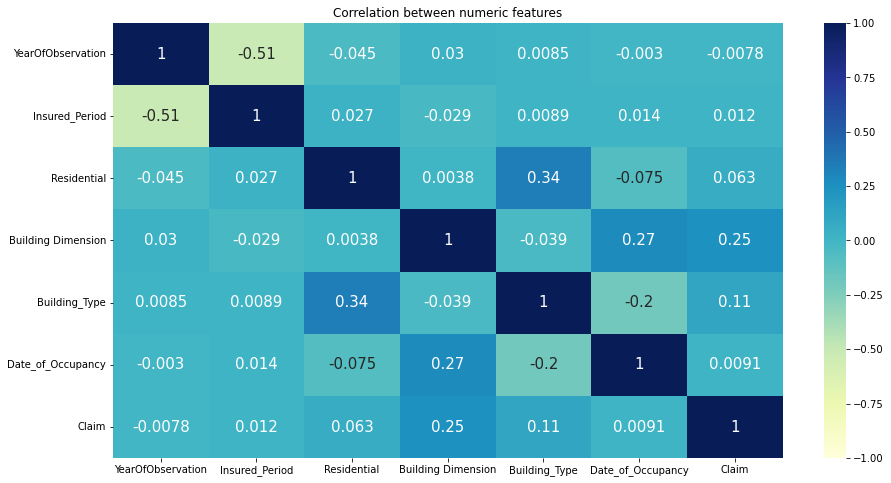

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})
plt.title('Correlation between numeric features')
plt.show()

### label encoding

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         4753 non-null   object 
 1   YearOfObservation   4753 non-null   int64  
 2   Insured_Period      4753 non-null   float64
 3   Residential         4753 non-null   int64  
 4   Building_Painted    4753 non-null   object 
 5   Building_Fenced     4753 non-null   object 
 6   Garden              4753 non-null   object 
 7   Settlement          4753 non-null   object 
 8   Building Dimension  4753 non-null   float64
 9   Building_Type       4753 non-null   int64  
 10  Date_of_Occupancy   4753 non-null   float64
 11  NumberOfWindows     4753 non-null   object 
 12  Geo_Code            4753 non-null   object 
 13  Claim               4753 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 557.0+ KB


In [36]:
#Encoding of categorical variables We use Label Encoder
df_train['Building_Painted'] = df_train['Building_Painted'].replace(['N', 'V'],[1,0])
df_train['Building_Fenced'] = df_train['Building_Fenced'].replace(['N', 'V'],[1,0])
df_train['Garden'] = df_train['Garden'].replace(['V','O'],[1,0])
df_train['Settlement'] = df_train['Settlement'].replace(['R','U'],[0,1])
df_train['Building_Type'] = df_train['Building_Type'].replace([1,2,3,4],[0,1,2,3])

In [37]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,1,290.0,0,1960.0,.,1053,0
2,H3802,2014,1.0,0,1,0,1,1,595.0,0,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1,1,2840.0,0,1960.0,.,1053,0
5,H4977,2012,1.0,0,0,1,0,0,535.0,0,1980.0,3,1143,0
6,H7390,2012,1.0,0,1,0,1,1,2830.0,0,1988.0,.,1143,0


In [38]:
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].replace(['   .','>=10'],['', 10])

In [39]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,1,290.0,0,1960.0,,1053,0
2,H3802,2014,1.0,0,1,0,1,1,595.0,0,1960.0,,1053,0
3,H3834,2013,1.0,0,0,0,1,1,2840.0,0,1960.0,,1053,0
5,H4977,2012,1.0,0,0,1,0,0,535.0,0,1980.0,3,1143,0
6,H7390,2012,1.0,0,1,0,1,1,2830.0,0,1988.0,,1143,0


In [40]:
df_train1 = df_train

In [41]:
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].replace(['1','2','3','4','5','6','7','8','9',10],[0,1,2,3,4,5,6,7,8,9])

In [42]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,1,290.0,0,1960.0,,1053,0
2,H3802,2014,1.0,0,1,0,1,1,595.0,0,1960.0,,1053,0
3,H3834,2013,1.0,0,0,0,1,1,2840.0,0,1960.0,,1053,0
5,H4977,2012,1.0,0,0,1,0,0,535.0,0,1980.0,2,1143,0
6,H7390,2012,1.0,0,1,0,1,1,2830.0,0,1988.0,,1143,0


In [43]:
train_df_le = df_train

In [44]:
#With One Hot Encoder and no removal of outliers
train_df_he = train_df_copy.copy()

In [45]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [46]:
train_df_he.nunique()

Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64

In [47]:
train_df_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         4753 non-null   object 
 1   YearOfObservation   4753 non-null   int64  
 2   Insured_Period      4753 non-null   float64
 3   Residential         4753 non-null   int64  
 4   Building_Painted    4753 non-null   int64  
 5   Building_Fenced     4753 non-null   int64  
 6   Garden              4753 non-null   int64  
 7   Settlement          4753 non-null   int64  
 8   Building Dimension  4753 non-null   float64
 9   Building_Type       4753 non-null   int64  
 10  Date_of_Occupancy   4753 non-null   float64
 11  NumberOfWindows     4753 non-null   object 
 12  Geo_Code            4753 non-null   object 
 13  Claim               4753 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 557.0+ KB


In [48]:
train_df_le['NumberOfWindows'] = pd.to_numeric(train_df_le['NumberOfWindows'])

In [49]:
train_df_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         4753 non-null   object 
 1   YearOfObservation   4753 non-null   int64  
 2   Insured_Period      4753 non-null   float64
 3   Residential         4753 non-null   int64  
 4   Building_Painted    4753 non-null   int64  
 5   Building_Fenced     4753 non-null   int64  
 6   Garden              4753 non-null   int64  
 7   Settlement          4753 non-null   int64  
 8   Building Dimension  4753 non-null   float64
 9   Building_Type       4753 non-null   int64  
 10  Date_of_Occupancy   4753 non-null   float64
 11  NumberOfWindows     2018 non-null   float64
 12  Geo_Code            4753 non-null   object 
 13  Claim               4753 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 557.0+ KB


In [50]:
train_df_le_trial = train_df_le.drop(train_df_le[train_df_le.Geo_Code.str.contains(r'[A-Z]')].index)

In [51]:
train_df_le.shape

(4753, 14)

In [52]:
train_df_le_trial.shape

(4710, 14)

In [53]:
train_df_le_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         4710 non-null   object 
 1   YearOfObservation   4710 non-null   int64  
 2   Insured_Period      4710 non-null   float64
 3   Residential         4710 non-null   int64  
 4   Building_Painted    4710 non-null   int64  
 5   Building_Fenced     4710 non-null   int64  
 6   Garden              4710 non-null   int64  
 7   Settlement          4710 non-null   int64  
 8   Building Dimension  4710 non-null   float64
 9   Building_Type       4710 non-null   int64  
 10  Date_of_Occupancy   4710 non-null   float64
 11  NumberOfWindows     1986 non-null   float64
 12  Geo_Code            4710 non-null   object 
 13  Claim               4710 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 552.0+ KB


In [54]:
train_df_le['Geo_code'] = pd.to_numeric(train_df_le_trial['Geo_Code'])

In [55]:
train_df_le_trial.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   0
Settlement               0
Building Dimension       0
Building_Type            0
Date_of_Occupancy        0
NumberOfWindows       2724
Geo_Code                 0
Claim                    0
dtype: int64

In [56]:
#Since number of windows has almost half plus missing values we drop it as replacing with mode would introduce a bias
train_df_le = train_df_le_trial
train_df_le = train_df_le.drop(columns = ['Customer Id','NumberOfWindows'])

In [57]:
train_df_le.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
0,2013,1.0,0,1,0,1,1,290.0,0,1960.0,1053,0
2,2014,1.0,0,1,0,1,1,595.0,0,1960.0,1053,0
3,2013,1.0,0,0,0,1,1,2840.0,0,1960.0,1053,0
5,2012,1.0,0,0,1,0,0,535.0,0,1980.0,1143,0
6,2012,1.0,0,1,0,1,1,2830.0,0,1988.0,1143,0


# Modelling with label encoding

In [58]:
#Creating features and labels and converting the data to arrays for the data done using label encoding
#Labels that we want to predict
labels_y = np.array(train_df_le['Claim'])

#Create the features by dropping the label
features_x = train_df_le.drop('Claim', axis=1)

#Save feature names for later use
feature_list_x = list(features_x.columns)

#Convert to numpy arrays
features_x = np.array(features_x)

## By Using Cross Validation

In [59]:
#By using cross KFold validation purposes
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

count = 1

#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in kf.split(features_x,labels_y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 3768, Validation set:942
Fold:2, Train set: 3768, Validation set:942
Fold:3, Train set: 3768, Validation set:942
Fold:4, Train set: 3768, Validation set:942
Fold:5, Train set: 3768, Validation set:942


In [60]:
#By using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state= 0)
score = cross_val_score(dtc, features_x, labels_y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.68471338 0.66029724 0.69214437 0.6985138  0.69745223]
Average score: 0.69


In [61]:
#By using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 42)
score = cross_val_score(rfc, features_x, labels_y, cv=kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.78131635 0.75053079 0.77176221 0.77494692 0.78874735]
Average score: 0.77


## Choosing the Best Model using Grid Search Cross validation

In [62]:
#Creating the train and test sets of the new data set using scikit-learn
from sklearn.model_selection import train_test_split
train_X, test_x, train_Y, test_y = train_test_split(features_x, labels_y, test_size = 0.2, random_state = 42)

In [63]:
#Getting the best model
#The Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier(random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model, space, scoring='accuracy', cv = kf, refit=True)
result = search.fit(train_X, train_Y)

In [64]:
best_model = result.best_estimator_

In [65]:
#Evaluate the model on the hold out dataset
yhat = best_model.predict(test_x)

In [66]:
# Accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, yhat)
print(f'Best Model Accuracy: {"{:.3f}".format(acc)}')

Best Model Accuracy: 0.794


# Predicting the Test Data using the best Model

In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [68]:
df_test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [69]:
new_test_df = df_test[df_test['Date_of_Occupancy'].notna()]

In [70]:
new_test_df.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    13
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows        0
Geo_Code              13
dtype: int64

In [71]:
#We drop missing values for date of occupancy [Quite many]
#Replace Building Dimension NAN with median
new_test_df['Building Dimension'] = new_test_df['Building Dimension'].fillna(new_test_df['Building Dimension'].median())
#Replace categorical variables with mode
new_test_df['Garden'] = new_test_df['Garden'].fillna(new_test_df['Garden'].mode()[0])
new_test_df['Geo_Code'] = new_test_df['Geo_Code'].fillna(new_test_df['Geo_Code'].mode()[0])

In [72]:
#Label Encoding
#Encoding of categorical variables We use Label Encoder
new_test_df['Building_Painted'] = new_test_df['Building_Painted'].replace(['N','V'],[1,0])
new_test_df['Building_Fenced'] = new_test_df['Building_Fenced'].replace(['N','V'],[1,0])
new_test_df['Garden'] = new_test_df['Garden'].replace(['V','O'],[1,0])
new_test_df['Settlement'] = new_test_df['Settlement'].replace(['R','U'],[0,1])
new_test_df['Building_Type'] = new_test_df['Building_Type'].replace([1,2,3,4],[0,1,2,3])

In [73]:
#Drop the Alphanumeric characters in Geo-code
new_test_df = new_test_df.drop(new_test_df[new_test_df.Geo_Code.str.contains(r'[A-Z]')].index)

In [74]:
#Convert Geo-code into numeric
new_test_df['Geo_Code'] = pd.to_numeric(new_test_df['Geo_Code'])

In [75]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2275 non-null   object 
 1   YearOfObservation   2275 non-null   int64  
 2   Insured_Period      2275 non-null   float64
 3   Residential         2275 non-null   int64  
 4   Building_Painted    2275 non-null   int64  
 5   Building_Fenced     2275 non-null   int64  
 6   Garden              2275 non-null   int64  
 7   Settlement          2275 non-null   int64  
 8   Building Dimension  2275 non-null   float64
 9   Building_Type       2275 non-null   int64  
 10  Date_of_Occupancy   2275 non-null   float64
 11  NumberOfWindows     2275 non-null   object 
 12  Geo_Code            2275 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 248.8+ KB


In [76]:
new_test_df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [77]:
data_to_predict = new_test_df.drop(columns=['Customer Id','NumberOfWindows'])

In [78]:
data_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   2275 non-null   int64  
 1   Insured_Period      2275 non-null   float64
 2   Residential         2275 non-null   int64  
 3   Building_Painted    2275 non-null   int64  
 4   Building_Fenced     2275 non-null   int64  
 5   Garden              2275 non-null   int64  
 6   Settlement          2275 non-null   int64  
 7   Building Dimension  2275 non-null   float64
 8   Building_Type       2275 non-null   int64  
 9   Date_of_Occupancy   2275 non-null   float64
 10  Geo_Code            2275 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 213.3 KB


### Predicted_values

In [79]:
#Convert the test data into an array
test_array = np.array(data_to_predict)

In [80]:
#Predicted Claim Status
predicted_values = best_model.predict(test_array)

In [81]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
#Convert the predicted values to an dataframe
predicted_df = pd.DataFrame(predicted_values, columns=['Claim'])

In [83]:
#Get the count of the predicted values
predicted_df['Claim'].value_counts()

0    2061
1     214
Name: Claim, dtype: int64

In [84]:
#Creat a dataframe for the customer id
col = ['Customer Id']
customer_id_df = new_test_df[col]

In [85]:
predicted_df_final= pd.concat([customer_id_df,predicted_df], axis=1)

In [86]:
predicted_df_final.head(5)

,Customer Id,Claim
0,H11920,0.0
1,H11921,0.0
2,H9805,0.0
3,H7493,0.0
4,H7494,0.0


In [87]:
#Export the dataframe of predicted values to a csv file
predicted_df_final.to_csv(r'E:\\5_New_Job\\Insurance_Claim_prediction\\Insurance_Claim_predicted_File.csv', index=None, header=True)